# MPM 200:Session 5_HW_JRiner

### Due 19th Nov 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

In [ ]:
install.packages ('beepr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘audio’




In [ ]:
library(beepr)

In [ ]:
beep("mario")

Warning message in value[[3L]](cond):
“beep() could not play the sound due to the following error:
Error in play.default(x, rate, ...): no audio drivers are available
”


Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

In [ ]:
install.packages("tidyverse")# type = 'binary'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)

In [ ]:
install.packages ("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)

In [ ]:
install.packages("sjPlot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘effectsize’, ‘bayestestR’, ‘datawizard’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’




In [ ]:
library(sjPlot)


Attaching package: ‘sjPlot’


The following object is masked from ‘package:ggplot2’:

    set_theme




## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [ ]:
#read the csv file and
data  = read.csv('/content/sample_data/Hummingbird_data.csv')

In [ ]:
colnames(data)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

**Q2. How many rows and columns are in the datafame**  
1 point

In [ ]:
nrow(data)

[1] 6908

In [ ]:
ncol(data)

[1] 12

There are 6908 rows and 12 columns.

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [ ]:
str(data)

'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [ ]:
# Identify data types of each column
data_types = sapply(data, class)
print(data)

       Admitted Disposition_binary         Place F_Aid       Species_e
1      1/2/1991               Died       Lindsey    No            ANHU
2      1/2/1991           Released       Lindsey   Yes            ANHU
3      1/4/1991               Died       Lindsey    No            ANHU
4      1/5/1991               Died       Lindsey    No            ANHU
5      1/5/1991               Died       Lindsey    No            ANHU
6      1/5/1991               Died       Lindsey    No            ANHU
7      1/6/1991               Died       Lindsey    No            ANHU
8      1/7/1991               Died       Lindsey    No            ANHU
9      1/8/1991               Died       Lindsey    No            ANHU
10    1/11/1991               Died       Lindsey    No            ANHU
11    1/13/1991               Died       Lindsey    No            ANHU
12    1/14/1991               Died       Lindsey    No            ANHU
13    1/21/1991               Died       Lindsey    No            ANHU
14    

Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [ ]:
library(dplyr)
model_data = sample_n(data, 5000)

**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

In [ ]:
nrow(model_data)

[1] 5000

In [ ]:
ncol(model_data)

[1] 12

There are 5000 rows and 12 columns.

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

In [ ]:
data_types = sapply(model_data, class)
print(data)

       Admitted Disposition_binary         Place F_Aid       Species_e
1      1/2/1991               Died       Lindsey    No            ANHU
2      1/2/1991           Released       Lindsey   Yes            ANHU
3      1/4/1991               Died       Lindsey    No            ANHU
4      1/5/1991               Died       Lindsey    No            ANHU
5      1/5/1991               Died       Lindsey    No            ANHU
6      1/5/1991               Died       Lindsey    No            ANHU
7      1/6/1991               Died       Lindsey    No            ANHU
8      1/7/1991               Died       Lindsey    No            ANHU
9      1/8/1991               Died       Lindsey    No            ANHU
10    1/11/1991               Died       Lindsey    No            ANHU
11    1/13/1991               Died       Lindsey    No            ANHU
12    1/14/1991               Died       Lindsey    No            ANHU
13    1/21/1991               Died       Lindsey    No            ANHU
14    

In [ ]:
str(model_data)

'data.frame':	5000 obs. of  12 variables:
 $ Admitted          : chr  "1/20/1995" "3/22/2013" "11/7/2013" "3/18/2012" ...
 $ Disposition_binary: chr  "Died" "Died" "Died" "Released" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "No" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Male" "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Spring" "Fall" "Spring" ...
 $ r                 : chr  "caught by domestic animal" "found on the ground" "found on the ground" "found on the ground" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "741_ANHU" "4653_ANHU" "4822_ANHU" "4393_ANHU" ...


There are 11 categorical variables (chr) and 1 continuous variable (int)

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [ ]:
write.csv(model_data, "/content/Hummingbird_data_JaneRiner.csv")

In [ ]:
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [ ]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4135
Santa Barbara,74
malibu,791


In [ ]:
rehab = model_data  %>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

In [ ]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

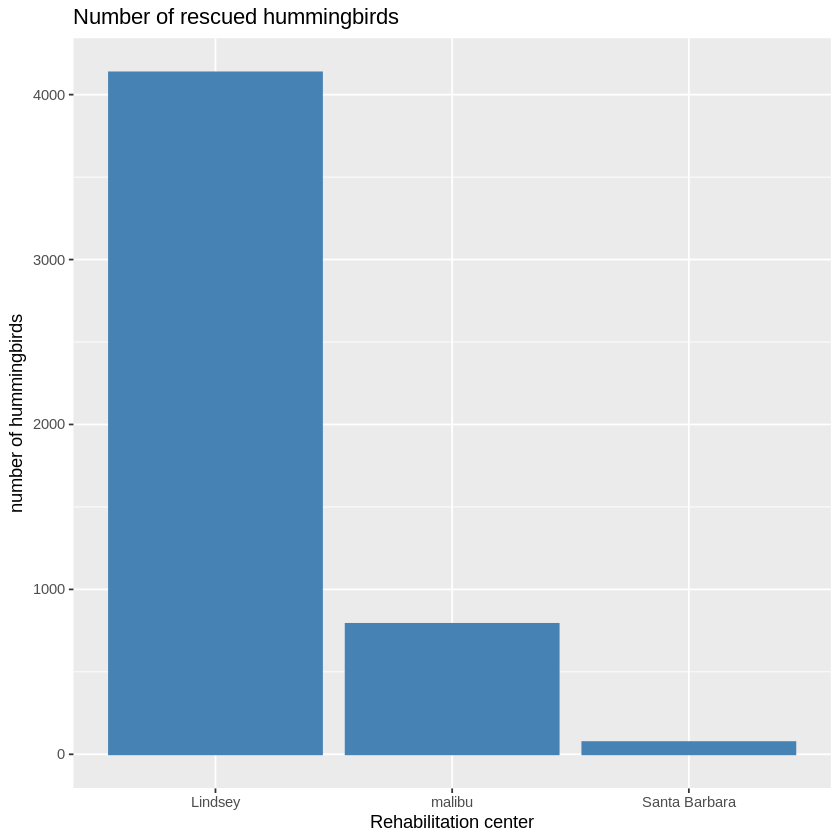

In [ ]:
p

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

In [ ]:
ggsave("/content/Hummingbird_plot.pdf", width = 4, height = 3)

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

The first line of code, starting from the "Rehab" object, is using the original data frame model_data and grouping it by the variable Place and counting how many distinct IDs appear in that group as part of a new object or data frame called "Rehab".
The next line of code is creating a bar plot for a variable called p using ggplot and the data frame rehab, where Place is on the x axis and count is on the y axis. The next line with Geom_bar makes the height of each bar the counts in the data and specifies the color of the fill and outline, steel blue. Xlab and ylab create axis labels called rehabilitation center and number of hummingbirds, respectively. Labs refers to the main title of the plot, Number of rescued hummingbirds. The last line, p, displays the resulting ggplot object.

# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

5 covariates that might affect survival: Age_e, Place, F_Aid, season, and r

In [ ]:
df_age = model_data  %>%
group_by(Age_e, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Age_e'. You can override using the
`.groups` argument.


In [ ]:
df_age

Age_e,Disposition_binary,count
<chr>,<chr>,<int>
Nestling,Died,427
Nestling,Released,761
adult-like,Died,2793
adult-like,Released,1019


In [ ]:
p <- ggplot(df_age, aes(x = Age_e, y = count, fill = Disposition_binary)) +
     geom_bar(stat = "identity", position = "dodge") +
     ylab("Number of birds") +
     xlab("Age") +
     labs(title = "Survival by Age")

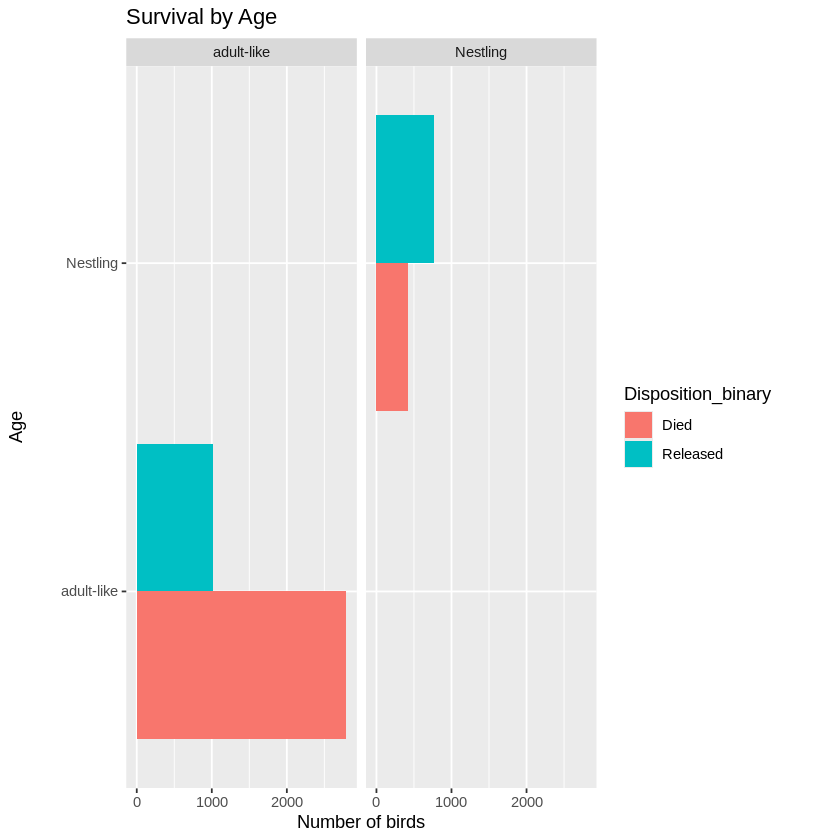

In [ ]:
p + facet_grid(. ~ Age_e)+ coord_flip()

In [ ]:
df_place = model_data  %>%
group_by(Place, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


In [ ]:
df_place

Place,Disposition_binary,count
<chr>,<chr>,<int>
Lindsey,Died,2685
Lindsey,Released,1450
Santa Barbara,Died,42
Santa Barbara,Released,32
malibu,Died,493
malibu,Released,298


In [ ]:
p <- ggplot(df_place, aes(x = Place, y = count, fill = Disposition_binary)) +
     geom_bar(stat = "identity", position = "dodge") +
     ylab("Number of birds") +
     xlab("Place") +
     labs(title = "Survival by Rehab Facility")

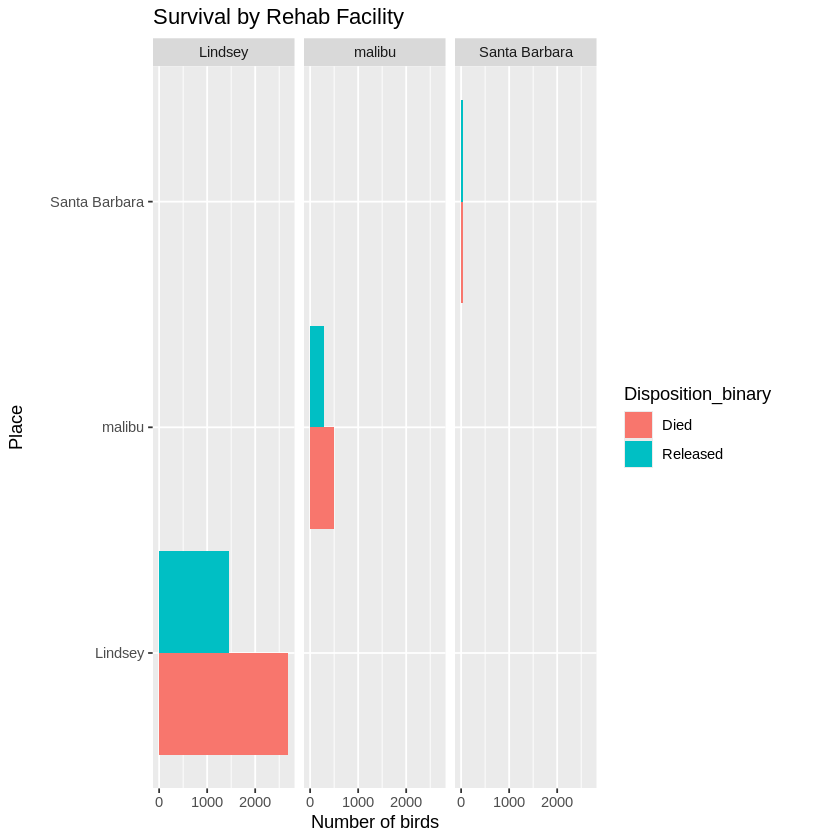

In [ ]:
p + facet_grid(. ~ Place)+ coord_flip()

In [ ]:
df_Faid = model_data  %>%
group_by(F_Aid, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'F_Aid'. You can override using the
`.groups` argument.


In [ ]:
df_Faid

F_Aid,Disposition_binary,count
<chr>,<chr>,<int>
No,Died,2097
No,Released,1199
Yes,Died,1123
Yes,Released,581


In [ ]:
p <- ggplot(df_Faid, aes(x = F_Aid, y = count, fill = Disposition_binary)) +
     geom_bar(stat = "identity", position = "dodge") +
     ylab("Number of birds") +
     xlab("First Aid") +
     labs(title = "Survival by First Aid Rendered")

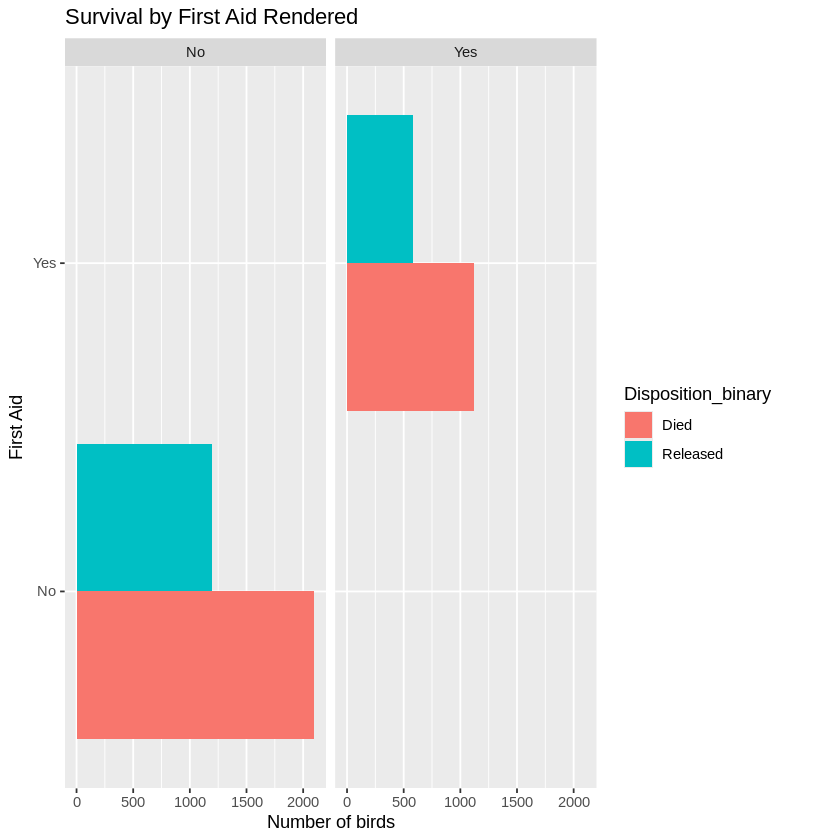

In [ ]:
p + facet_grid(. ~ F_Aid)+ coord_flip()

In [ ]:
df_season = model_data  %>%
group_by(season, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


In [ ]:
df_season

season,Disposition_binary,count
<chr>,<chr>,<int>
Fall,Died,385
Fall,Released,54
Spring,Died,1330
Spring,Released,935
Summer,Died,938
Summer,Released,599
Winter,Died,567
Winter,Released,192


In [ ]:
p <- ggplot(df_season, aes(x = season, y = count, fill = Disposition_binary)) +
     geom_bar(stat = "identity", position = "dodge") +
     ylab("Number of birds") +
     xlab("Season") +
     labs(title = "Survival by Season")

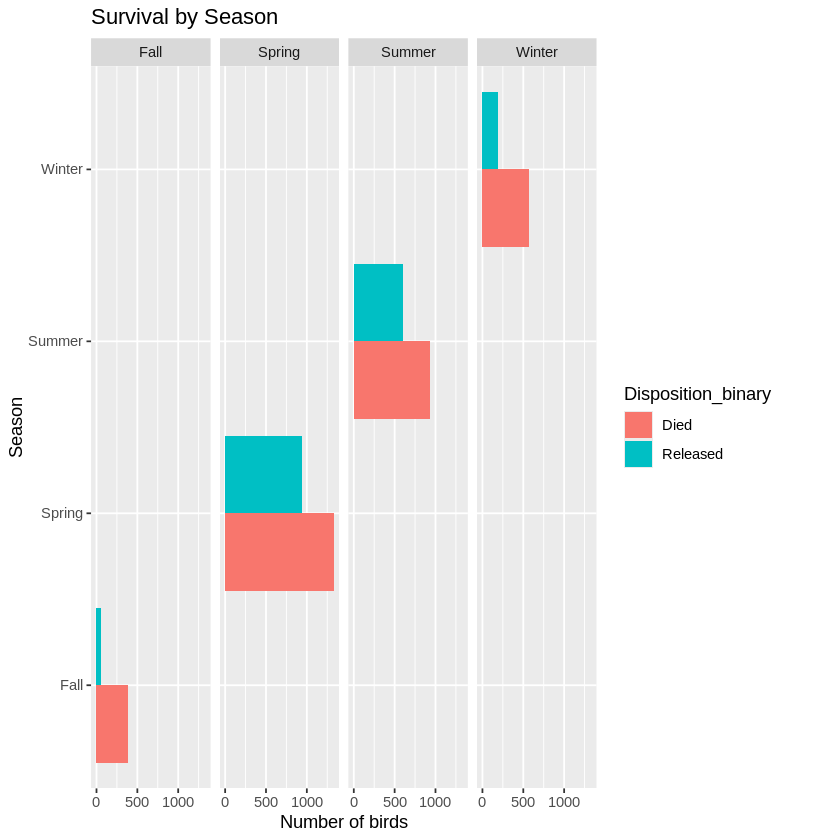

In [ ]:
p + facet_grid(. ~ season)+ coord_flip()

In [ ]:
df_r = model_data  %>%
group_by(r, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'r'. You can override using the `.groups`
argument.


In [ ]:
df_r

r,Disposition_binary,count
<chr>,<chr>,<int>
caught by domestic animal,Died,461
caught by domestic animal,Released,167
found inside,Died,118
found inside,Released,41
found on the ground,Died,1431
found on the ground,Released,744
nest-related,Died,259
nest-related,Released,400
suspect torpor-like state,Died,84


In [ ]:
p <- ggplot(df_r, aes(x = r, y = count, fill = Disposition_binary)) +
     geom_bar(stat = "identity", position = "dodge") +
     ylab("Number of birds") +
     xlab("Reason for Admit") +
     labs(title = "Survival by Reason for Admit")

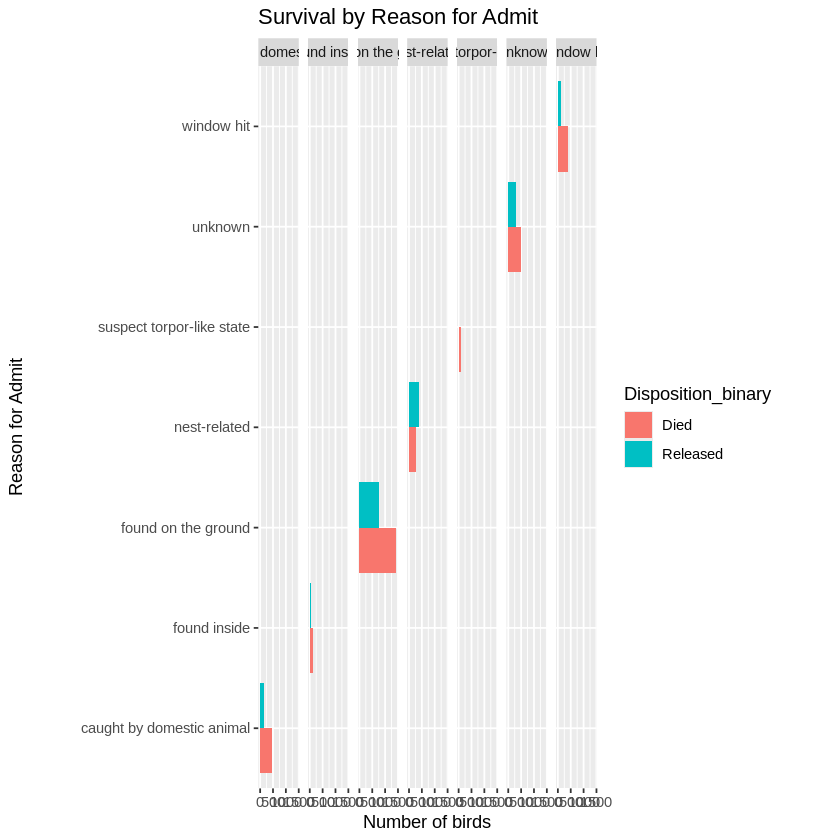

In [ ]:
p + facet_grid(. ~ r)+ coord_flip()

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

Age appears to be related to survival, with more deaths than releases in adult like birds, compared to more releases compared to deaths in nestlings but out of a smaller number of total intakes. We can test this with a chi square test for independence.

Rehab facility, or place, appears to have a relationship with survival, although the intakes are much larger for some facilities compared to others. Santa Barbara appears to have roughly equal that died vs were released, but a smaller number of intakes, compared to Lindsey which appears to have more birds that died than survived to release, but a larger number of total intakes. The relationship is similar for Malibu, possibly with a smaller difference, but we would need to test this with a chi square test for independence, or a fisher's exact test for centers with very small intake numbers.

For first aid, the relationship is unclear - among birds not given first aid, more died than survived, and the same pattern appears for birds given first aid, with potentially a smaller difference but lower total numbers. To test this, we can use a chi square for independence or logistic regression using first aid as a predictor.

For season, it appears more birds died than were released in the Fall, for a relatively small total, versus Spring where again more died than were released for a larger number admitted. We can compare this to Summer, which seems to have more balanced survival compared to the other seasons, suggesting season may influence survival. You could use a chi-square test for independence to see if disposition is associated with season, or use logistic regression with season as a predictor and survival as the outcome.  

For reason for admission (r), the plot shows more birds that died than were released when they were admitted found on the ground, caught by domestic animal, or window hit, so this appears to be associated with their final disposition but we could test this using a chi-square for independence.


## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


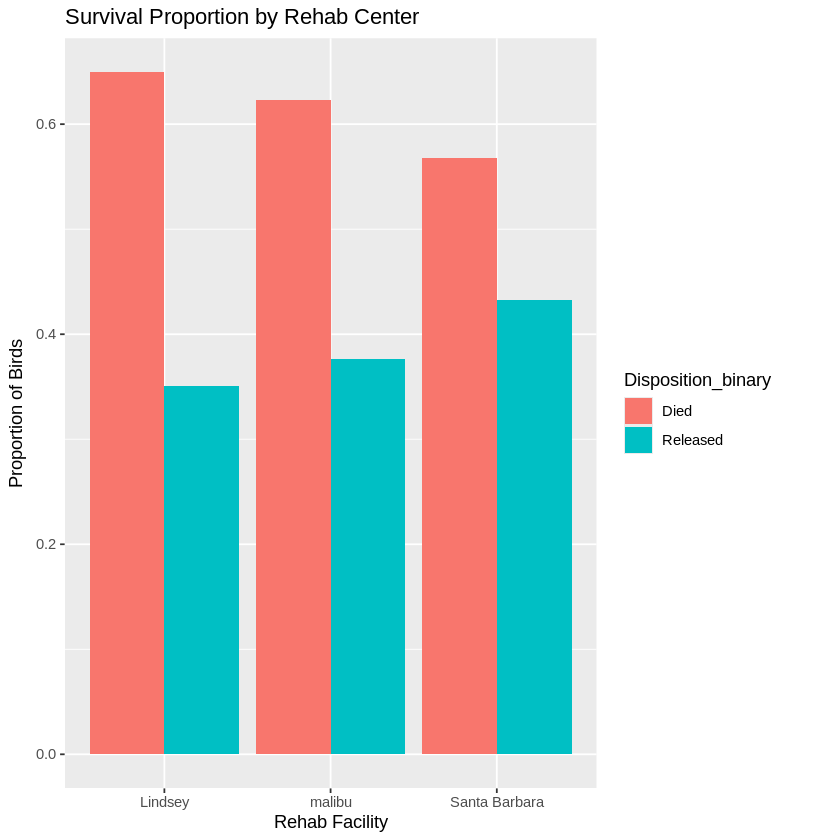

In [ ]:
# Calculate proportions
proportions = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID)) %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))

# Plot the proportions
ggplot(proportions, aes(x = Place, y = proportion, fill = Disposition_binary )) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehab Facility") +
  ylab("Proportion of Birds") +
  labs(title = "Survival Proportion by Rehab Center")

### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

`summarise()` has grouped output by 'Species_group'. You can override using the
`.groups` argument.


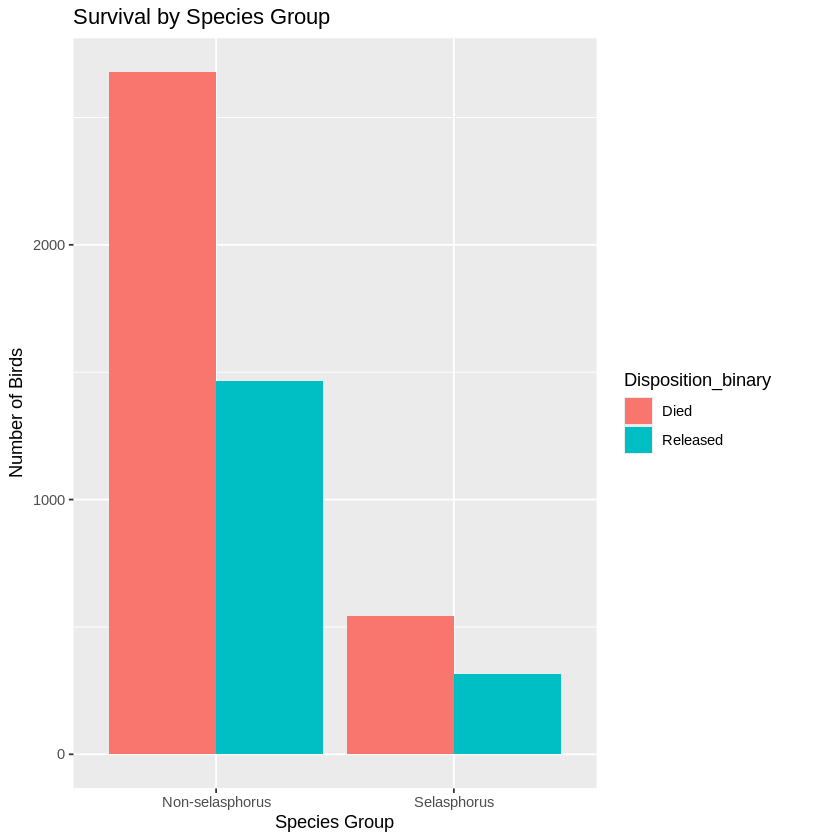

In [ ]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?

model_data$Species_group = ifelse(model_data$Species_e %in% c ("ANHU", "BCHU", "Non-selasphorus"), "Non-selasphorus", "Selasphorus")

# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

ggplot(species_distribution, aes(x = Species_group, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Species Group") +
  ylab("Number of Birds") +
  labs(title = "Survival by Species Group")

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [ ]:
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")

Q12a Please explain the argument `format` in code above

The argument format explains how the input date is structured in the date admitted column to make sure they are being read correctly.

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [ ]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%Y-%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n_distinct(ID))

admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n_distinct(ID))

Finally, we can use `ggplot` to plot these timelines.

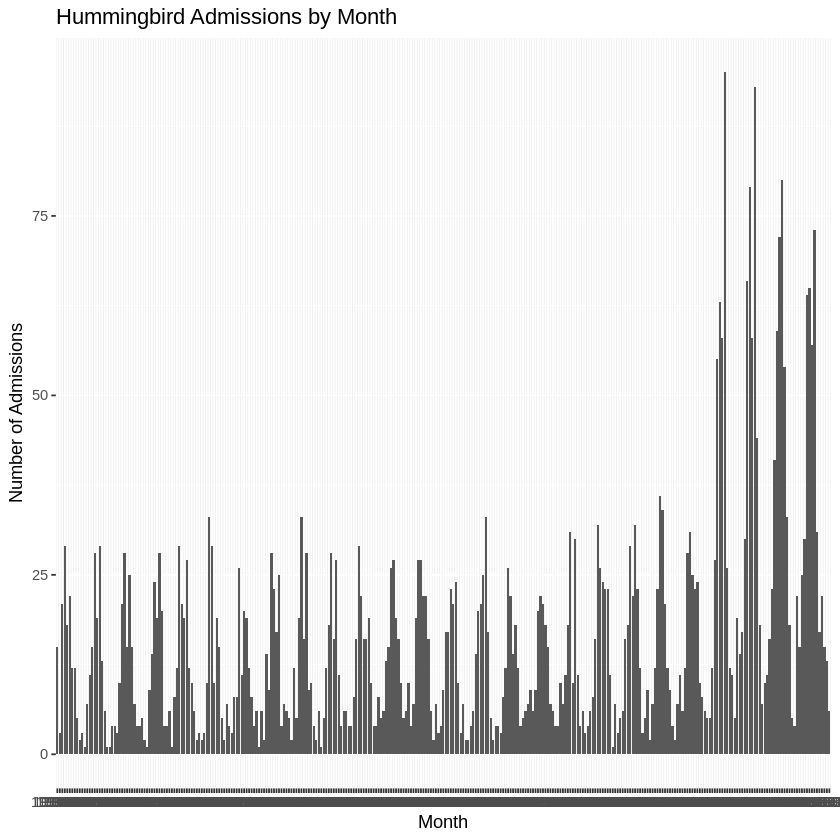

In [ ]:
# Plot admissions by month
ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Month") +
  ylab("Number of Admissions") +
  labs(title = "Hummingbird Admissions by Month")

In [ ]:
## Plot similar timeline for Yearly admissions of Hummingbirds

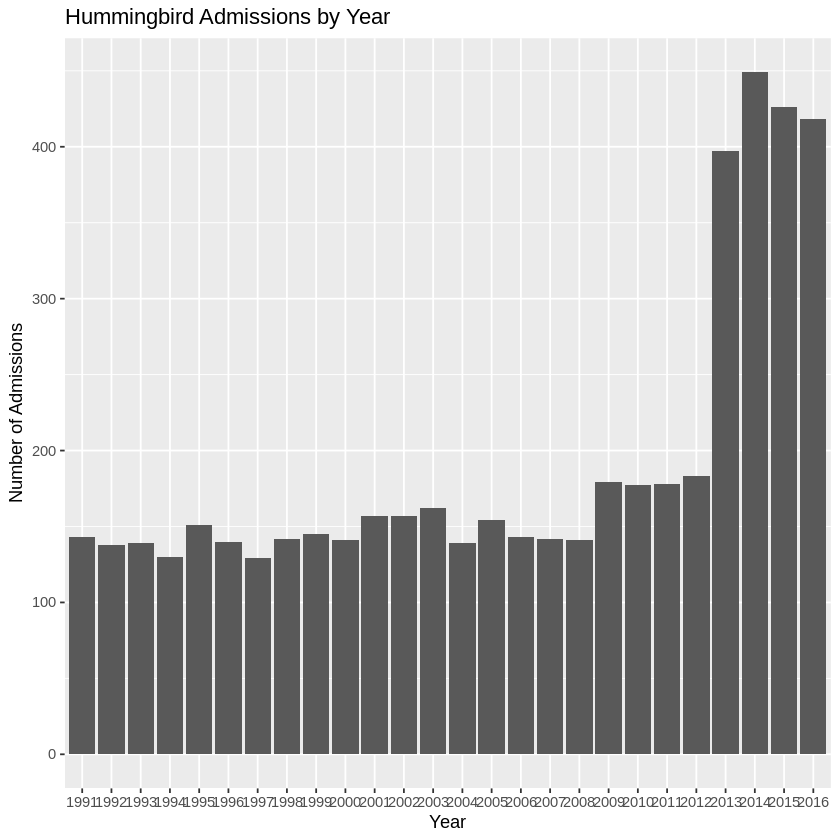

In [ ]:
# Admissions by year
ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Year") +
  ylab("Number of Admissions") +
  labs(title = "Hummingbird Admissions by Year")